In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import os
import eda

In [15]:
df1 = pd.read_csv("./data/avg_data_10min_wh/loc_1/fold_0/train.csv", index_col="DateTime", parse_dates=["DateTime"])
df1.head()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
DateTime,,,,,,,
2024-01-01 09:00:00,1.0,1.91588,1017.906,18.33,92.29,8395.250,17.368
2024-01-01 09:10:00,1.0,0.09000,1017.965,18.02,97.37,7046.501,12.612
2024-01-01 09:20:00,1.0,0.01800,1018.163,17.73,99.93,5919.584,8.807
2024-01-01 09:30:00,1.0,0.01800,1018.205,17.90,100.00,8838.918,17.564
2024-01-01 09:40:00,1.0,0.03600,1018.131,18.08,100.00,5774.665,7.508


In [56]:
# start = (df1.index.floor("min") - pd.to_timedelta(df1.index.minute % 10, "minute"))[0]
# df_avg = df1.resample("10min", origin=start).mean()

In [3]:
# df1 = df1.resample('10min').fillna(method=None)

/tmp/ipykernel_128130/1583852319.py:1: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  df1 = df1.resample('10min').fillna(method=None)


In [16]:
df_stat = eda.EDA(df1)
df_stat.explore_stats()

,feature,data_type,n_distinct,n_missing,n_negative,n_zeros,count,mean,std,min,25%,50%,75%,max
0,LocationCode,float64,1 (0.06%),0 (0.00%),0 (0.00%),0 (0.00%),1728.0,1.000000,0.000000,1.000,1.00000,1.0000,1.0000,1.00000
1,WindSpeed(m/s),float64,671 (38.83%),232 (13.43%),0 (0.00%),280 (16.20%),1496.0,0.726047,0.947447,0.000,0.02400,0.3240,1.0830,4.49219
2,Pressure(hpa),float64,1424 (82.41%),232 (13.43%),0 (0.00%),0 (0.00%),1496.0,1014.768324,3.723398,1006.915,1011.96900,1014.3955,1017.3445,1023.80800
3,Temperature(°C),float64,1112 (64.35%),232 (13.43%),0 (0.00%),0 (0.00%),1496.0,24.937019,7.190922,12.380,19.20750,23.3600,30.0650,44.25000
4,Humidity(%),float64,1145 (66.26%),232 (13.43%),0 (0.00%),0 (0.00%),1496.0,69.579799,22.931753,22.840,50.08000,70.8050,89.9950,100.00000
5,Sunlight(Lux),float64,1493 (86.40%),232 (13.43%),0 (0.00%),0 (0.00%),1496.0,28933.436476,32664.859754,186.417,6455.68700,14045.3755,36345.4500,117758.20000
6,Power(mW),float64,1485 (85.94%),232 (13.43%),0 (0.00%),0 (0.00%),1496.0,330.312627,548.531985,0.016,9.78675,44.3995,304.7515,1857.33600


In [33]:
df1['index'] = np.arange(0, len(df1), 1)

In [5]:
# df1["Pressure(hpa)"] = np.where(df1["Pressure(hpa)"] >= 1100, np.nan, df1["Pressure(hpa)"])
# df1["Pressure(hpa)"] = df1["Pressure(hpa)"].fillna(df1["Pressure(hpa)"].rolling(6, center=True).mean())

In [6]:
# df1["Humidity(%)"] = np.where(df1["Humidity(%)"] > 100, np.nan, df1["Humidity(%)"])
# df1["Humidity(%)"] = df1["Humidity(%)"].fillna(df1["Humidity(%)"].rolling(6, center=True).mean())

In [17]:
df1.drop(columns=["LocationCode"], inplace=True)

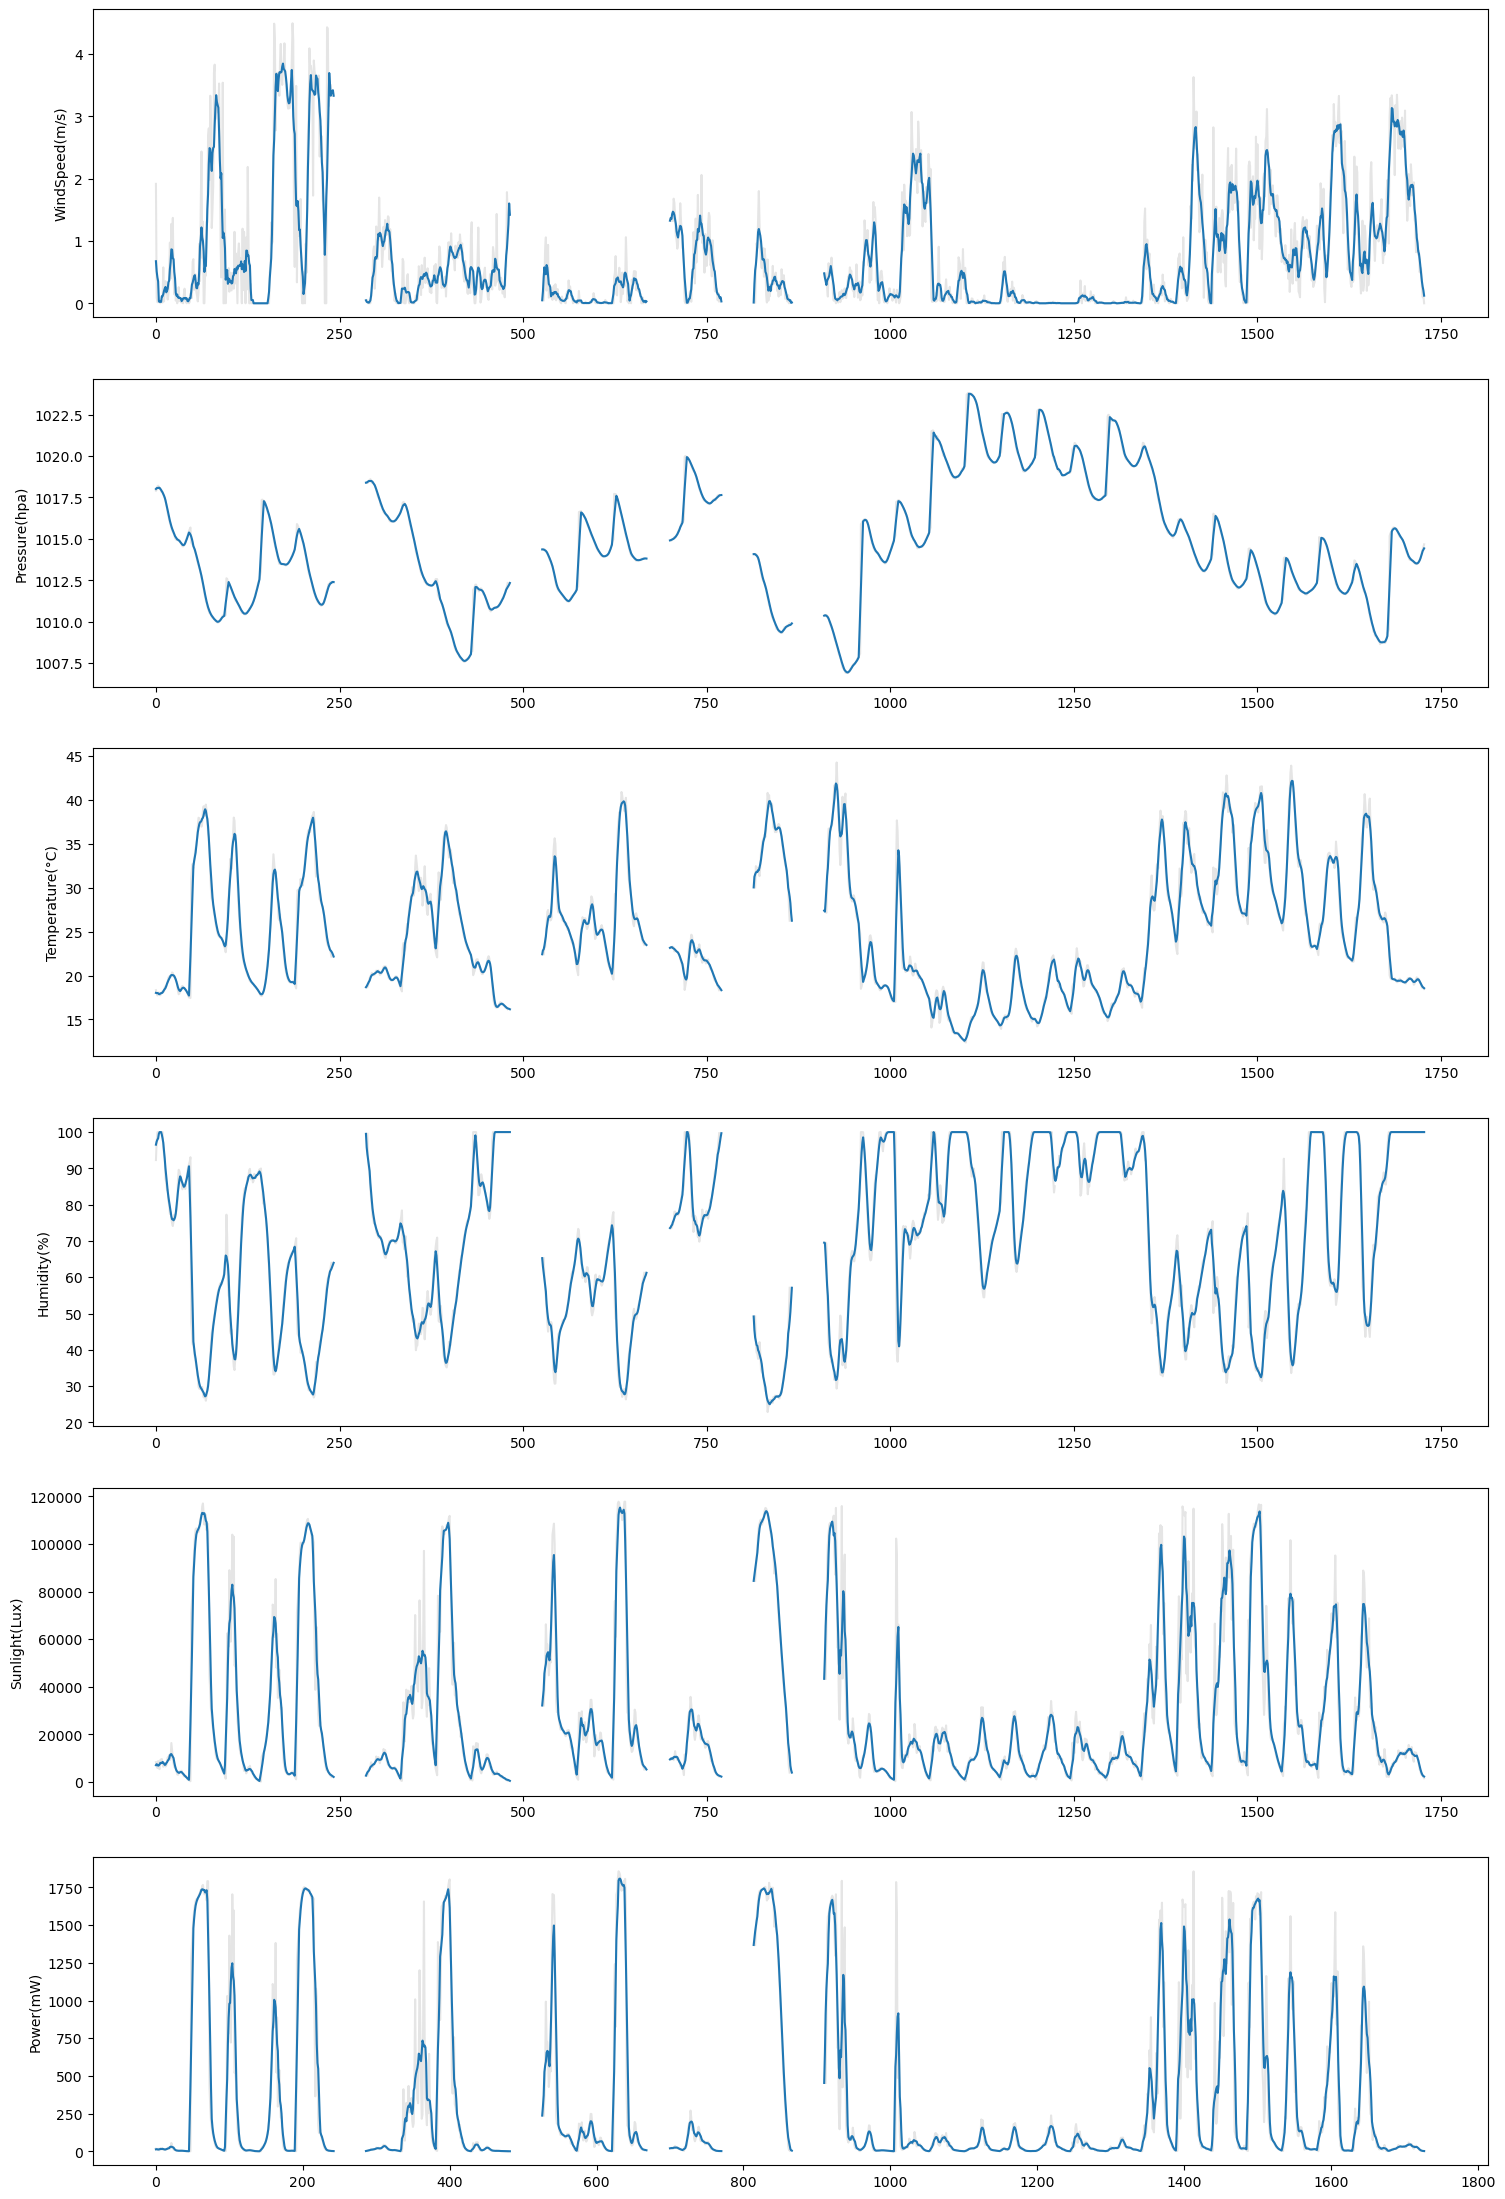

In [ ]:
fig, ax = plt.subplots(6, 1, figsize=(18, 28))
i = 0

for col in df1.columns[0:6]:
    ax[i].plot(df1['index'], df1[col], color="grey", alpha=0.2)
    moving_avg = df1[col].rolling(6, center=True, min_periods=1).mean()
    ax[i].plot(df1['index'], moving_avg)
    ax[i].set_ylabel(col)
    i += 1

In [10]:
df2 = df1.copy()
features = ['WindSpeed(m/s)','Pressure(hpa)','Temperature(°C)','Humidity(%)','Sunlight(Lux)', 'Power(mW)']
for feature in features:
  df2[feature] = df2[feature].interpolate(method='nearest')

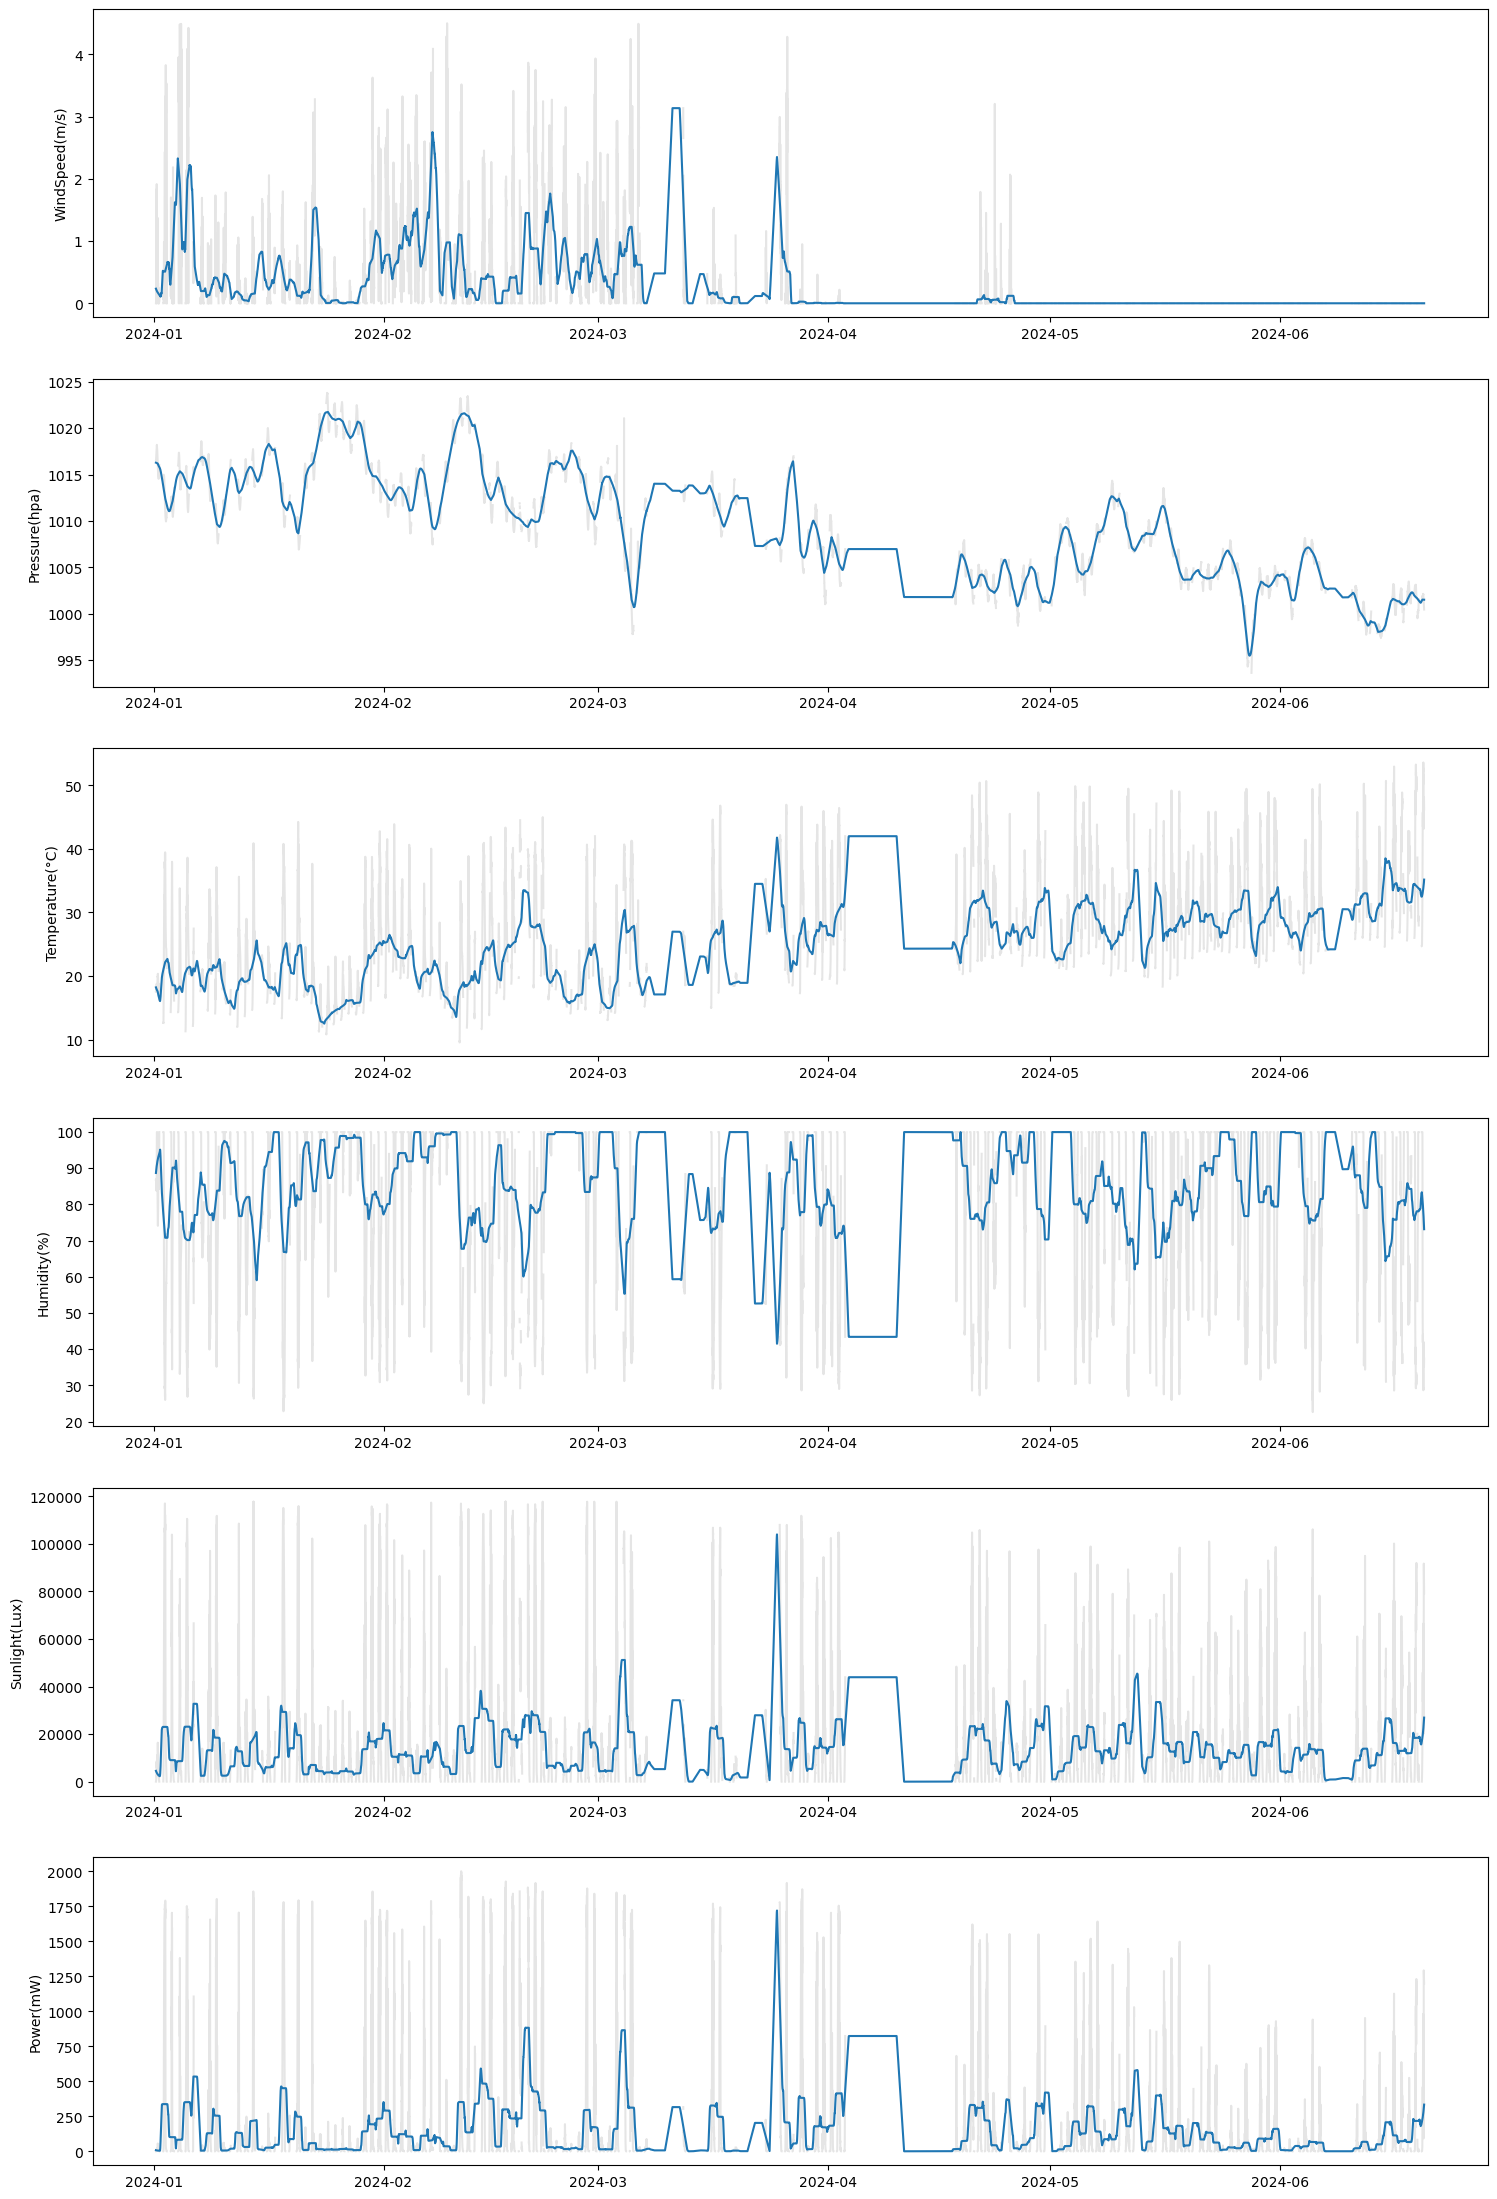

In [11]:
fig, ax = plt.subplots(6, 1, figsize=(18, 28))
i = 0
for col in df2.columns[0:]:
    ax[i].plot(df2.index, df1[col], color="grey", alpha=0.2)
    moving_avg = df2[col].rolling(144, center=True, min_periods=1).mean()
    ax[i].plot(df2.index, moving_avg)
    ax[i].set_ylabel(col)
    i += 1

In [10]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# fig, ax = plt.subplots(6, 1, figsize=(12, 28))
# i = 0
# for col in df1.columns[0:]:
#     plot_pacf(df1[col], ax=ax[i])
#     ax[i].set_xlabel(col)
#     i += 1

In [11]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_np = scaler.fit_transform(df1)
# df1_avg_scaled = pd.DataFrame(scaled_np, index=df1.index, columns=df1.columns)

In [15]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=4)

for i, (train_index, test_index) in enumerate(tscv.split(df1)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[   0    1    2 ... 5569 5570 5571]
  Test:  index=[ 5572  5573  5574 ... 11138 11139 11140]
Fold 1:
  Train: index=[    0     1     2 ... 11138 11139 11140]
  Test:  index=[11141 11142 11143 ... 16707 16708 16709]
Fold 2:
  Train: index=[    0     1     2 ... 16707 16708 16709]
  Test:  index=[16710 16711 16712 ... 22276 22277 22278]
Fold 3:
  Train: index=[    0     1     2 ... 22276 22277 22278]
  Test:  index=[22279 22280 22281 ... 27845 27846 27847]


In [31]:
df1[df1.reset_index().index.isin(train_index)]

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
RoundDt,,,,,,,
2024-01-01 06:20:00,17.0,0.0,1022.910,17.90,63.10,22.500,0.000
2024-01-01 06:30:00,17.0,0.0,1022.998,17.90,63.33,52.500,0.007
2024-01-01 06:40:00,17.0,0.0,1023.094,17.90,63.69,183.750,0.017
2024-01-01 06:50:00,17.0,0.0,1023.177,17.96,64.16,356.251,0.050
2024-01-01 07:00:00,17.0,0.0,1023.203,18.03,65.22,751.166,0.175
...,...,...,...,...,...,...,...
2024-06-03 22:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-03 22:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-03 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
RoundDt,,,,,,
2024-01-01 06:20:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 06:30:00,0.0,1023.01,17.9,63.1,29.17,0.00
2024-01-01 06:40:00,0.0,1023.00,17.9,63.6,96.67,0.01
2024-01-01 06:50:00,0.0,1023.17,17.9,63.9,340.00,0.05
2024-01-01 07:00:00,0.0,1023.19,18.0,64.4,617.50,0.13
...,...,...,...,...,...,...
2024-06-10 09:20:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-10 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-10 09:40:00,NaN,NaN,NaN,NaN,NaN,NaN
